## Computer Vision Projects : Face Blurring

___

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)
print(np.__version__)

4.8.0
1.23.4


___

#### 1. detecting multiple faces of an input image using haarcascade approach

Text(0.5, 1.0, 'output')

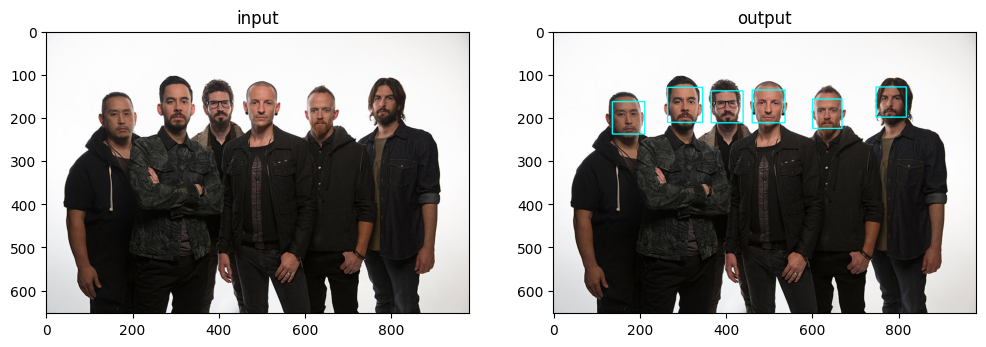

In [3]:
import cv2

# Load a Linkin Park image as the input image
image = cv2.imread('images/Linkin-Park.jpg')

# get a copy of the image to work on it
image2 = image.copy()

# Load haarcascade pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# Convert the image colormap to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image2, (x, y), (x+w, y+h), (255, 255, 0), 2)

# Display the output image
cv2.imshow('OpenCV Face Detection', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# show by plt
plt.figure(figsize = (12,8))  
plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title('input');
plt.subplot(122); plt.imshow(image2[:,:,::-1]); plt.title('output')

#### 2. blurring detected faces of an input image using haarcascade approach

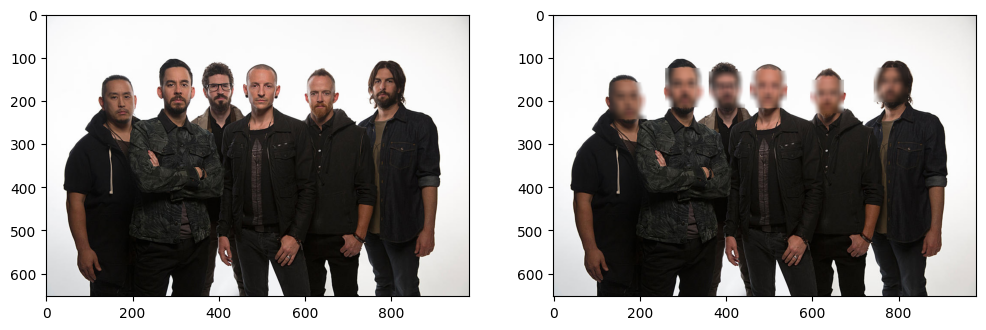

In [4]:
import cv2

# Load the input image
image = cv2.imread('images/Linkin-Park.jpg')

# getting shape of image
height, width, _ = image.shape

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# get a copy of the image to work on it
image2 = image.copy()

# Blure faces on image2
for (x, y, w, h) in faces:
    
    # determine coordinates of blurred rectangles
    pad = 5
    xmin = x - pad
    ymin = y - pad
    xmax = x + w + pad
    ymax = y + h + pad
    if xmin <= 0:
        xmin = 0
    if ymin <= 0:
        ymin = 0 
    if xmax >= width:
        xmax = width
    if ymax >= height:
        ymax = height
    
    # Blurring
    roi = image2[ymin:ymax, xmin:xmax]
    blurred_roi = cv2.blur(roi, (15,15))
    image2[ymin:ymax, xmin:xmax] = blurred_roi
    

# Display the input and output images

cv2.imshow('input image', image)
cv2.imshow('image with blurred faces', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# show by plt
plt.figure(figsize = (12,8))  
plt.subplot(121); plt.imshow(image[:,:,::-1])
plt.subplot(122); plt.imshow(image2[:,:,::-1])

___

#### 3. blurring multiple faces in a source camera (real time blurring) using haarcascade approach

In [7]:
# getting shape of webcam frames

# cap = cv2.VideoCapture(0)
# ret, frame = cap.read()
# cap.release()
# frame.shape

(480, 640, 3)

In [5]:
import cv2

# getting a video capture object
cap = cv2.VideoCapture(0)

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

while True:
    ret, frame = cap.read()
    if not ret: 
        break
    
    
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # get a copy of the frame to work on it
    frame2 = frame.copy()

    
    
    # Blure faces on frame2
    for (x, y, w, h) in faces:

        # determine coordinates of blurred rectangles
        pad = 5
        xmin = x - pad
        ymin = y - pad
        xmax = x + w + pad
        ymax = y + h + pad
        if xmin <= 0:
            xmin = 0
        if ymin <= 0:
            ymin = 0 
        if xmax >= 640:
            xmax = 640
        if ymax >= 480:
            ymax = 480

        # Blurring
        roi = frame2[ymin:ymax, xmin:xmax]
        blurred_roi = cv2.blur(roi, (31,31))
        frame2[ymin:ymax, xmin:xmax] = blurred_roi


    # Display the input and output frames
    cv2.imshow('input image', frame)
    cv2.imshow('image with blurred faces', frame2)
    
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()